In [1]:
import random 
random.seed(3456)
from v2.ddqn_agent import DDQNAgent

Using TensorFlow backend.


In [2]:
num_coins_per_order = 0 #0 means buy/sell all per order
recent_k = 150

# Always BUY

In [3]:
dummy = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_always_buy",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01, verbose=False)

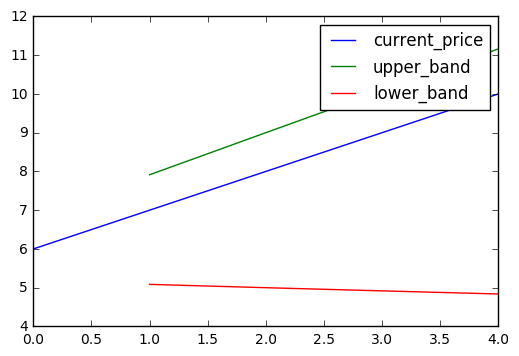

In [4]:
dummy.env.plot(states_to_plot=["current_price", "upper_band", "lower_band"])

In [5]:
dummy.train(num_episodes=300)

episode: 1/300, returns: 8.0886629, epsilon: 1.0
episode: 2/300, returns: 8.0886629, epsilon: 1.0
episode: 3/300, returns: -1.980198, epsilon: 1.0
episode: 4/300, returns: 40.0282841, epsilon: 1.0
episode: 5/300, returns: 44.1182245, epsilon: 1.0
episode: 6/300, returns: -1.980198, epsilon: 1.0
episode: 7/300, returns: 63.366336, epsilon: 1.0
episode: 8/300, returns: 63.366336, epsilon: 0.99
episode: 9/300, returns: 8.910891, epsilon: 0.99
episode: 10/300, returns: 12.0226295, epsilon: 0.99
episode: 11/300, returns: 63.366336, epsilon: 0.98
episode: 12/300, returns: 30.693069, epsilon: 0.98
episode: 13/300, returns: 9.8043615, epsilon: 0.97
episode: 14/300, returns: 12.0226295, epsilon: 0.97
episode: 15/300, returns: 0.0, epsilon: 0.96
episode: 16/300, returns: 40.0282841, epsilon: 0.96
episode: 17/300, returns: 47.0297025, epsilon: 0.95
episode: 18/300, returns: 42.3389817, epsilon: 0.95
episode: 19/300, returns: 8.0886629, epsilon: 0.94
episode: 20/300, returns: 10.2722709, epsilon: 

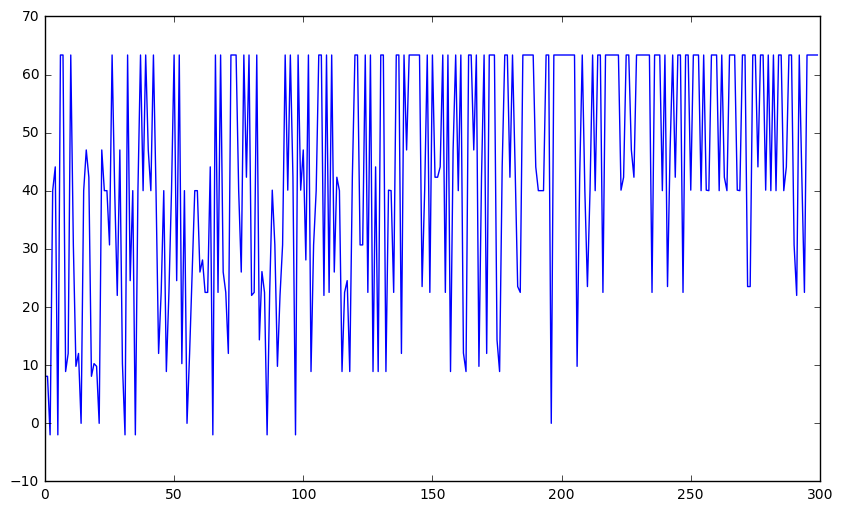

In [6]:
dummy.plot_cum_returns()

In [7]:
dummy.test(epsilon=0.23)

Action.BUY
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
63.366336


In [8]:
dummy.print_my_memory()

[6.0, 0]_Action.BUY_420.084819_[7.0, 1]_False
62


[6.0, 0]_Action.BUY_653.46534_[6.0, 1]_False
190


[6.0, 0]_Action.HOLD_0.0_[6.0, 0]_False
110


[6.0, 0]_Action.HOLD_0.0_[7.0, 0]_False
48


[6.0, 1]_Action.HOLD_490.099005_[7.0, 1]_False
172


[6.0, 1]_Action.SELL_0.0_[7.0, 0]_False
18


[7.0, 0]_Action.BUY_245.049354_[8.0, 1]_False
26


[7.0, 0]_Action.BUY_280.229796_[8.0, 1]_False
12


[7.0, 0]_Action.HOLD_0.0_[8.0, 0]_False
28


[7.0, 1]_Action.HOLD_280.056546_[8.0, 1]_False
45


[7.0, 1]_Action.HOLD_326.73267_[8.0, 1]_False
147


[7.0, 1]_Action.SELL_0.0_[8.0, 0]_False
42


[8.0, 0]_Action.BUY_108.91089_[9.0, 1]_False
11


[8.0, 0]_Action.BUY_122.004828_[9.0, 1]_False
5


[8.0, 0]_Action.BUY_124.546554_[9.0, 1]_False
3


[8.0, 0]_Action.BUY_142.338933_[9.0, 1]_False
15


[8.0, 0]_Action.HOLD_0.0_[9.0, 0]_False
36


[8.0, 1]_Action.HOLD_122.524677_[9.0, 1]_False
20


[8.0, 1]_Action.HOLD_140.028273_[9.0, 1]_False
34


[8.0, 1]_Action.HOLD_140.114898_[9.0, 1]_False
11


[8.0, 1]_Ac

In [9]:
print dummy.model.predict([6.0, 0])

[[ 57550.90234375  60283.8359375   27678.47265625]]


In [10]:
print dummy.model.predict([6.5, 0])

[[ 61524.60546875  64446.2421875   29589.578125  ]]


In [11]:
print dummy.model.predict([7.0, 0])

[[ 65498.296875    68608.640625    31500.68164062]]


In [12]:
print dummy.model.predict([7.0, 1])

[[ 73026.5703125  76494.3984375  35121.3125   ]]


In [13]:
print dummy.model.predict([8.0, 0])

[[ 73445.6875    76933.4375    35322.890625]]


## Thoughts
* is the model really learning something useful here?
* why is it learning such astronomical values? did we do something wrong?
    * so the model should predict the final state correctly right???? why is the 190, 199...etc. wtf

In [14]:
import numpy as np 

def __test_replay(self, batch_size):
        minibatch = random.sample(self.memory, self.batch_size)
        
        for state, action, reward, next_state, isDone in minibatch:
            target = self.model.predict(state)
            if isDone:
                target[0][action.value] = reward
                print "yep!"
                print state, action, reward, next_state, isDone
            else:
                a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action.value] = reward + self.gamma * t[np.argmax(a)]
            print "state", state, "target", target
                ## -0.60 + gamma * -0.50
            self.model.train(state, target)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [15]:
__test_replay(dummy, 30)

state [8.0, 1] target [[ 88650.171875    84819.1953125   38943.51953125]]
yep!
[9.0, 0] Action.BUY 0.0 [10.0, 1] True
state [9.0, 0] target [[ 81425.390625        0.          39156.95703125]]
state [7.0, 1] target [[ 80904.96875     76534.4921875   35139.98046875]]
state [6.0, 0] target [[ 65178.20703125  60326.7734375   27699.515625  ]]
state [8.0, 1] target [[ 88650.171875  84899.65625   38983.765625]]
state [7.0, 1] target [[ 80904.96875    76585.9375     35167.4765625]]
state [8.0, 1] target [[ 88650.171875    84943.1484375   39006.16796875]]
state [8.0, 1] target [[ 88650.171875    84967.6171875   39018.45703125]]
state [8.0, 1] target [[ 88650.171875    84993.8203125   39031.42578125]]
state [8.0, 1] target [[ 88650.171875    85021.5546875   39045.01171875]]
yep!
[9.0, 1] Action.HOLD 0.0 [10.0, 1] True
state [9.0, 1] target [[     0.          93398.0234375   42892.62109375]]
state [7.0, 1] target [[ 80904.96875    76722.8828125  35235.265625 ]]
state [8.0, 0] target [[ 80995.3203

# Never BUY

In [16]:
dummy_hold = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_never_buy",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01)

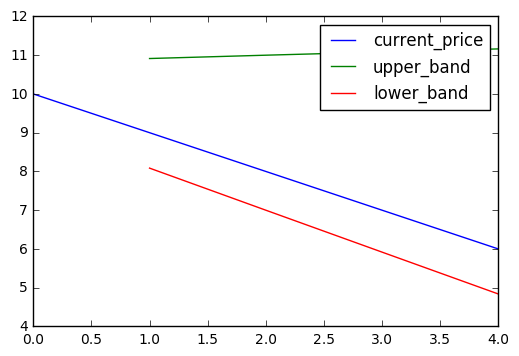

In [17]:
dummy_hold.env.plot(states_to_plot=["current_price", "upper_band", "lower_band"])

In [18]:
dummy_hold.train(num_episodes=300)

episode: 1/300, returns: -21.5841582, epsilon: 1.0
episode: 2/300, returns: -41.1881184, epsilon: 1.0
episode: 3/300, returns: 0.0, epsilon: 1.0
episode: 4/300, returns: -15.9830251, epsilon: 1.0
episode: 5/300, returns: -15.9830251, epsilon: 1.0
episode: 6/300, returns: 0.0, epsilon: 1.0
episode: 7/300, returns: -41.1881184, epsilon: 1.0
episode: 8/300, returns: -1.980198, epsilon: 0.99
episode: 9/300, returns: -15.9830251, epsilon: 0.99
episode: 10/300, returns: -1.980198, epsilon: 0.99
episode: 11/300, returns: -32.7448275, epsilon: 0.98
episode: 12/300, returns: -41.1881184, epsilon: 0.98
episode: 13/300, returns: -26.4851334, epsilon: 0.97
episode: 14/300, returns: -34.653465, epsilon: 0.97
episode: 15/300, returns: -15.9830251, epsilon: 0.96
episode: 16/300, returns: -14.2326645, epsilon: 0.96
episode: 17/300, returns: -35.1467837, epsilon: 0.95
episode: 18/300, returns: -15.9830251, epsilon: 0.95
episode: 19/300, returns: 0.0, epsilon: 0.94
episode: 20/300, returns: -41.1881184,

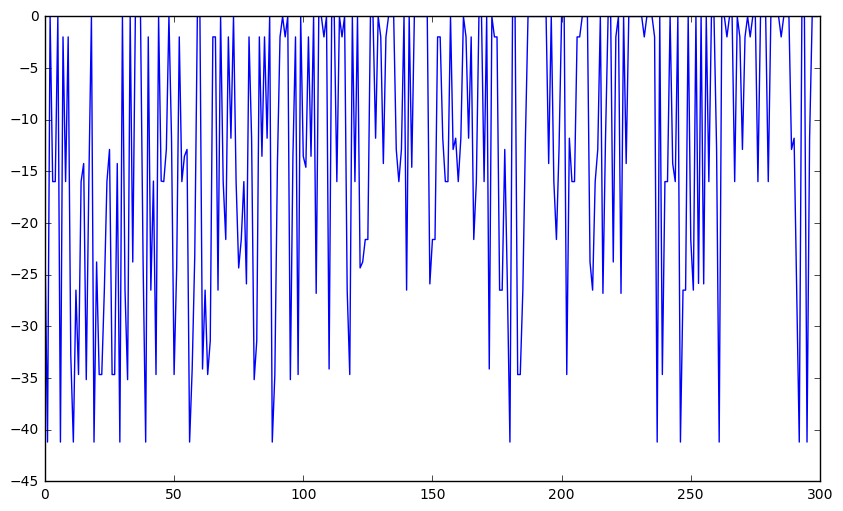

In [19]:
dummy_hold.plot_cum_returns()

In [20]:
dummy_hold.test(epsilon=0.23)

Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
0.0


# BUY & SELL

In [3]:
dummy_both = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_buy_sell_hold",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01)

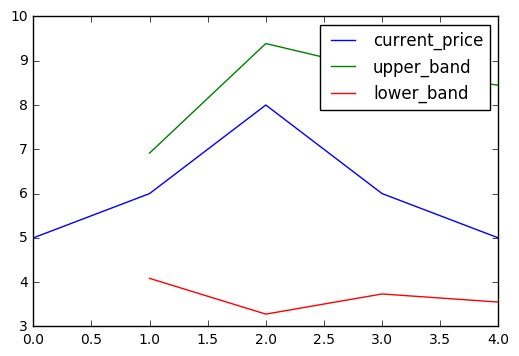

In [4]:
dummy_both.env.plot(states_to_plot=["current_price", "upper_band", "lower_band"])

In [5]:
dummy_both.train(num_episodes=500)

episode: 1/500, returns: -27.9408712, epsilon: 1.0
episode: 2/500, returns: -27.9408712, epsilon: 1.0
episode: 3/500, returns: -1.980198, epsilon: 1.0
episode: 4/500, returns: -18.3168315, epsilon: 1.0
episode: 5/500, returns: 15.2945792, epsilon: 1.0
episode: 6/500, returns: -1.980198, epsilon: 1.0
episode: 7/500, returns: -1.980198, epsilon: 1.0
episode: 8/500, returns: -1.980198, epsilon: 0.99
episode: 9/500, returns: -18.3168315, epsilon: 0.99
episode: 10/500, returns: 30.693069, epsilon: 0.99
episode: 11/500, returns: -1.980198, epsilon: 0.98
episode: 12/500, returns: 17.6237622, epsilon: 0.98
episode: 13/500, returns: -26.4851322, epsilon: 0.97
episode: 14/500, returns: 17.6237622, epsilon: 0.97
episode: 15/500, returns: 0.0, epsilon: 0.96
episode: 16/500, returns: -1.980198, epsilon: 0.96
episode: 17/500, returns: -3.921184, epsilon: 0.95
episode: 18/500, returns: -1.980198, epsilon: 0.95
episode: 19/500, returns: 17.6237622, epsilon: 0.94
episode: 20/500, returns: -18.3168315, 

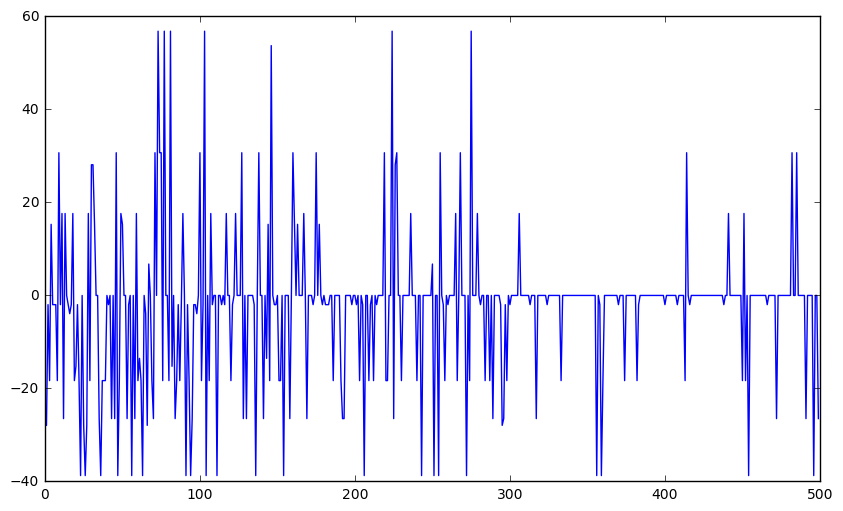

In [6]:
dummy_both.plot_cum_returns()

In [7]:
dummy_both.test(epsilon=0.19)

Action.HOLD
Action.BUY
Action.HOLD
Action.SELL
Action.HOLD
-1.980198
